# Loan Prediction Analysis

# Comprehensive Machine Learning Project

# Problem Statement

# Predict if one is viable for a loan


In [33]:
# Here we will import the libraries used for Machine Learning

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split, GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [34]:
df = pd.read_csv("loan payments data.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB
None


# Data understanding

In [35]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


# Checking for missing values 

In [36]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [37]:
df['paid_off_time'].mode()

0    9/25/2016 9:00
1    9/26/2016 9:00
dtype: object

In [38]:
#Filling missing values for non-numerical attributes 
df['paid_off_time'] = df['paid_off_time'].fillna(df['paid_off_time'].mode()[0])

In [39]:
#Filling missing values for non-numerical attributes 
df['past_due_days'].fillna(df['past_due_days'].mean(),inplace=True)

In [40]:
df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

### Creating dummies

In [41]:
col_names = df.columns
# finding unique categories for each variable
for col_name in col_names:
    if df[col_name].dtypes == 'object':
        unique_category = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_category} unique categories".format(col_name=col_name, unique_category=unique_category))

Feature 'Loan_ID' has 500 unique categories
Feature 'loan_status' has 3 unique categories
Feature 'effective_date' has 7 unique categories
Feature 'due_date' has 25 unique categories
Feature 'paid_off_time' has 320 unique categories
Feature 'education' has 4 unique categories
Feature 'Gender' has 2 unique categories


In [42]:
todummy_list = ['Gender', 'education']

In [43]:
df = df.drop(['Loan_ID', 'effective_date', 'due_date', 'paid_off_time'], 1)

In [44]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'past_due_days', 'age',
       'education', 'Gender'],
      dtype='object')

In [45]:
X = df.iloc[:,1:7 ]
Y = df.loan_status
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [46]:
X.head()


,Principal,terms,past_due_days,age,education,Gender
0,1000,30,36.01,45,High School or Below,male
1,1000,30,36.01,50,Bechalor,female
2,1000,30,36.01,33,Bechalor,female
3,1000,15,36.01,27,college,male
4,1000,30,36.01,28,college,female


In [47]:
Y.head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [48]:
X = dummy_df(X, todummy_list)
print(X.head(5))

   Principal  terms  past_due_days  age  Gender_female  Gender_male  \
0       1000     30          36.01   45              0            1   
1       1000     30          36.01   50              1            0   
2       1000     30          36.01   33              1            0   
3       1000     15          36.01   27              0            1   
4       1000     30          36.01   28              1            0   

   education_Bechalor  education_High School or Below  \
0                   0                               1   
1                   1                               0   
2                   1                               0   
3                   0                               0   
4                   0                               0   

   education_Master or Above  education_college  
0                          0                  0  
1                          0                  0  
2                          0                  0  
3                          0  


## Detecting and treating outliers 
    

In [49]:
def tukey_outliers(x):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outlier_ind = list(x.index[(x < lower)|(x > upper)])
    outlier_val = list(x[outlier_ind])
    
    return outlier_ind, outlier_val

In [50]:
tukey_indices, tukey_values = tukey_outliers(df['age'])
print(np.sort(tukey_values))

[49 50 50 50 50 51]


In [51]:
tukey_indices, tukey_values = tukey_outliers(df['Principal'])
print(np.sort(tukey_values))

[300 300 300 300 300 300 500 500 500 700 800 800 800 800 800 800 800 800
 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800
 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800
 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800
 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800
 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800 800
 800 800 800 800 800 800 800 800 800 800 800 800 800 900 900]


## Explore the different Techniques on how to treat and impute the Outliers detected in this dataset

# Generating a Pearsons Correlation Heatmap

<AxesSubplot:>

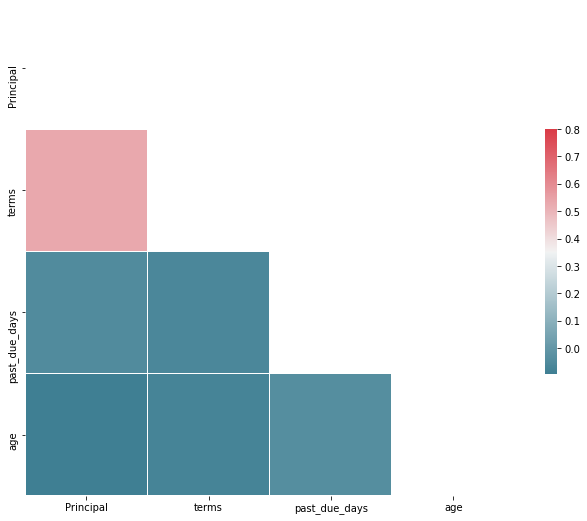

In [52]:
numeric_data_corr = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.zeros_like(numeric_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
#
# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(numeric_data_corr, mask=mask, cmap=cmap,vmax=.8,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

<AxesSubplot:>

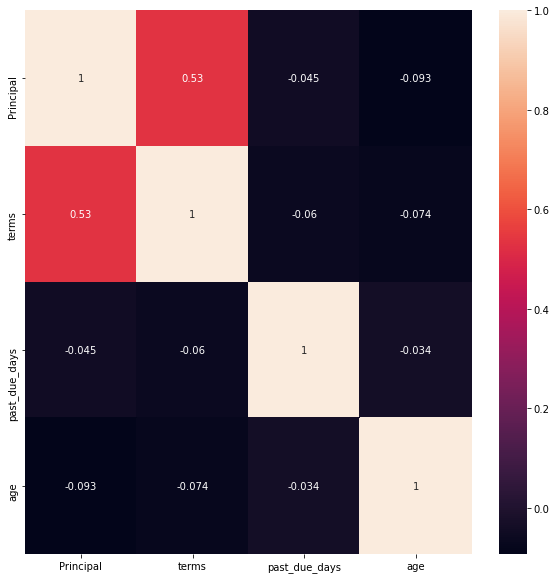

In [53]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True)

### Feature Scaling of the Features

#### Normalizing the Dataset

In [54]:
# Normalizing the dataset

normalized_data = X.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
normalized_data.head()

,Principal,terms,past_due_days,age,Gender_female,Gender_male,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1.0,1.000000,0.4668,0.818182,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.000000,0.4668,0.969697,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.000000,0.4668,0.454545,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.347826,0.4668,0.272727,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,1.000000,0.4668,0.303030,1.0,0.0,0.0,0.0,0.0,1.0


In [55]:
# Standardizing the Dataset

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(normalized_data)
standardized_data.shape

(500, 10)

 ### Splitting the data for Training and Testing

In [56]:
# Splitting the Dataset into  80 % Train and  20% Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2,stratify=Y, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 10) (400,)
Test set: (100, 10) (100,)


In [57]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LogisticRegression(), X,Y, cv=cv)

array([0.9 , 0.96, 0.96, 0.97, 0.93])

# Model building

#### Logistic Regression

                    precision    recall  f1-score   support

        COLLECTION       0.94      0.75      0.83        20
COLLECTION_PAIDOFF       1.00      0.90      0.95        20
           PAIDOFF       0.89      0.98      0.94        60

          accuracy                           0.92       100
         macro avg       0.94      0.88      0.91       100
      weighted avg       0.92      0.92      0.92       100



0.92

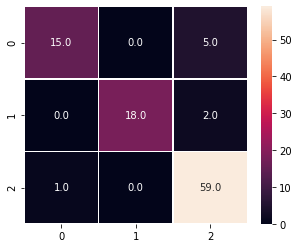

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Create the model
modelo_rl= LogisticRegression()

#Fit the model
modelo_rl.fit(X=X_train,y=y_train)

#Prediction
predicion_rl = modelo_rl.predict(X_test)

#Results:

#Clasification report
results_rl=metrics.classification_report(y_true=y_test, y_pred=predicion_rl)
print(results_rl)

#Confusion matrix
cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_rl)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

#Predict test set labels
y_pred = modelo_rl.predict(X_test)


#Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

In [28]:
#Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.92

#### K-Nearest Neighbour Classifier 


In [29]:
# Import KNN Classifer
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN
knn= KNeighborsClassifier(n_neighbors=7, metric= 'minkowski', p=2)

#Fit knn to the training set
knn.fit(X_train, y_train)


# Predict test set labels
y_pred =knn.predict(X_test)


# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)


0.95

In [30]:
# How to find the best K????

# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = KNN.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc


array([0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95])

([<matplotlib.axis.XTick at 0x2ae86c8c730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

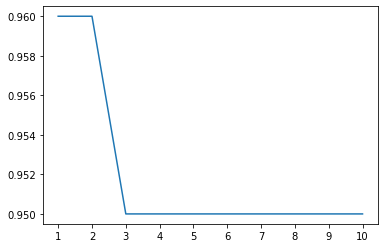

In [31]:
#3. cont. KNeighborsClassifier using various values of k
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_predict,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

#### Building the KNN Model again, using k=10

                    precision    recall  f1-score   support

        COLLECTION       0.94      0.80      0.86        20
COLLECTION_PAIDOFF       0.86      0.95      0.90        20
           PAIDOFF       0.98      1.00      0.99        60

          accuracy                           0.95       100
         macro avg       0.93      0.92      0.92       100
      weighted avg       0.95      0.95      0.95       100



0.95

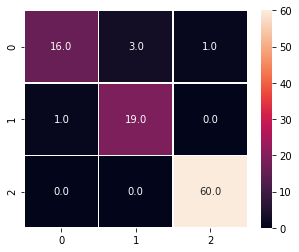

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
modelo_knn= KNeighborsClassifier(n_neighbors=10)

# Fit the model
modelo_knn.fit(X=X_train,y=y_train)

# Prediction
predicion_knn = modelo_knn.predict(X_test)


# Results:

# Clasification report
results_knn=metrics.classification_report(y_true=y_test, y_pred=predicion_knn)
print(results_knn)

# Confusion matrix
cm_knn= metrics.confusion_matrix(y_true=y_test, y_pred=predicion_knn)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)
